# Homework exercise 4
## Deadline: upload to Moodle by 22 June 18:00 h

__Please submit your homework either as a Jupyter Notebook or using .py files.__

If you use .py files, please also include a PDF containing the output of your code and your explanations. Either way, the code needs to be in a form that can be easily run on another computer.

__Name 1:__ Sebastian Ertner, 01126564

__Name 2:__ Sebastian Krendl, 01507718

__Name 3:__ Dushan Trajkovski, 01263345


The name of the file that you upload should be named *Homework1_YourLastName_YourStudentID*.

Reminder: you are required to attend class on 23 June to earn points for this homework exercise unless you have a valid reason for your absence.

You are encouraged to work on this exercise in teams of up to three students. If any part of the questions is unclear, please ask on the Moodle forum.

#### Classification, Sentiment Analysis


__1. Classification__

Attached you will find a file `company_data.csv` that contains data for a list of US-listed stocks for the year 2019. Each row contains data for one company, and the columns contain the following features: total assets, number of shares outstanding, long-term debt, EBIT, EBITDA, net income, stock price at the end of the year, highest price of the year, lowest price of the year, and the exchange code indicating on which exchange a stock is listed, where the value 11 refers to the New York Stock Exchange and the value 14 to Nasdaq. Before proceeding with the classification task, remove all rows where (i) any column has a missing value, (ii) the exchange code is different from 11 or 14, (iii) any duplicates.

Please use the data to predict the exchange listing using

* a Perceptron
* a DecisionTreeClassifier

You may increase the number of features by combining columns contained in the data set (e.g., earnings per share, to give just one example) before applying the learning algorithms.

Split the data into training and test data and apply the learning algorithms for various choices of the hyperparameters. (You are not expected to systematically find the best hyperparmeters, but please include all choices that you tried in your homework submission and not just the one delivering the best results.) For each choice of hyperparameters, report the percentage of correctly classified stocks for the training data and for the test data.

##### Patch sklearn for better performance

In [1]:
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


##### Import and clean data

In [2]:
import pandas as pd

df = pd.read_csv("./data/company_data.csv")
len(df)

5340

Remove any rows where:  
(i) any column has a missing value

In [3]:
df = df.dropna()
len(df)

4704

(ii) the exchange code is different from 11 or 14

In [4]:
df = df[(df['exchg'] == 11) | (df['exchg'] == 14)]
len(df)

4354

(iii) any duplicates

In [5]:
df = df.drop_duplicates()
len(df)

4299

Now we generate additional features from the existing ones:

In [6]:
df['eps'] = df['ni']/df['csho']
df['pe'] = df['prcc_c']/df['eps']
df['ev'] = df['prcc_c']*df['csho'] + df['dltt']
df['ev/ebitda'] = df['ev']/df['ebitda']
df

,at,csho,dltt,ebit,ebitda,ni,prcc_c,prch_c,prcl_c,exchg,eps,pe,ev,ev/ebitda
0,2079.000,35.097,670.900,108.400,152.100,4.400,45.10,52.7800,29.8400,11,0.125367,359.744250,2253.77470,14.817717
1,59995.000,428.203,28875.000,3706.000,6024.000,1686.000,28.68,37.2300,24.2300,14,3.937385,7.284023,41155.86204,6.831982
2,408.637,35.137,81.457,19.622,30.231,17.707,7.66,9.8400,6.5000,14,0.503942,15.200171,350.60642,11.597579
3,286.612,19.290,0.000,-1.173,-1.173,91.431,13.63,13.8000,9.0300,11,4.739813,2.875641,262.92270,-224.145524
4,18479.247,112.436,4884.430,671.960,1262.889,538.320,89.93,99.8100,81.6300,11,4.787790,18.783195,14995.79948,11.874202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5333,519.067,18.764,178.194,-7.886,40.877,-43.487,6.49,7.9700,4.6700,14,-2.317576,-2.800339,299.97236,7.338414
5334,460.302,34.603,198.925,27.193,55.840,7.507,2.15,4.3000,1.5600,14,0.216947,9.910277,273.32145,4.894725
5335,2302.500,48.300,117.100,154.900,240.700,113.300,44.55,46.3300,26.5694,11,2.345756,18.991748,2268.86500,9.426111
5336,30.421,3.318,14.234,1.284,1.840,1.088,1.85,18.9989,1.8000,14,0.327908,5.641820,20.37230,11.071902


Check how the categories are distributed:

In [7]:
df['exchg'].value_counts()

14    2585
11    1714
Name: exchg, dtype: int64

##### Perceptron

In [8]:
import numpy as np
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

In [9]:
y = df.loc[: , 'exchg'].values
X = df.drop(columns = ['exchg'])

We replace the categories:

In [10]:
y = np.where(y == 11, 0, 1)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

Inspect the split:

In [12]:
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [1714 2585]
Labels counts in y_train: [1222 1787]
Labels counts in y_test: [492 798]


We normalize the data:

In [13]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [14]:
X_train_std

array([[-1.61109086e-01, -2.82417116e-01, -2.17753205e-01, ...,
         8.52634033e-03, -2.77793959e-01, -1.23921349e-03],
       [-1.22889185e-01, -2.38878860e-01, -1.35944667e-01, ...,
        -1.42389565e-02, -1.80786239e-01, -7.03847900e-03],
       [-1.60165039e-01, -5.69656329e-02, -2.17799810e-01, ...,
        -3.98616556e-02, -2.57063558e-01, -3.23924129e-02],
       ...,
       [ 8.66064464e+00,  2.57259054e+01,  9.62201483e+00, ...,
        -1.00967270e-02,  4.36712442e+00, -2.24031368e-03],
       [-1.58629006e-01, -2.17619999e-01, -2.14347329e-01, ...,
        -6.57802244e-02, -2.67472886e-01,  1.63495184e-02],
       [-1.51992455e-01, -1.99832729e-01, -2.02415959e-01, ...,
        -5.89734674e-03, -2.29925893e-01, -4.41085753e-03]])

###### Example

Now we look at one example of a perceptron before testing out different choices of hyperparameters.

In [15]:
ppn = Perceptron(max_iter=100, eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, max_iter=100, random_state=1)

Check the accuracy:

In [16]:
print('Correctly classified stocks - training: {:.2f}%'.format(100*ppn.score(X_train_std,y_train)))
print('Correctly classified stocks - test: {:.2f}%'.format(100*ppn.score(X_test_std,y_test)))

Correctly classified stocks - training: 67.36%
Correctly classified stocks - test: 67.13%


Alternatively take a look at the confusion matrix, where the rows/columns are in order 'NYSTE', 'NASDAQ':

In [17]:
y_pred = ppn.predict(X_test_std)
confusion_matrix(y_test, y_pred)

array([[281, 211],
       [213, 585]], dtype=int64)

We see that the perceptron has problems especially with predicting the first category 'NYSTE' correctly.

###### Different hyperparameters

Among these are the hyperparamters we could use:

In [18]:
ppn.get_params()

{'alpha': 0.0001,
 'class_weight': None,
 'early_stopping': False,
 'eta0': 0.1,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'max_iter': 100,
 'n_iter_no_change': 5,
 'n_jobs': None,
 'penalty': None,
 'random_state': 1,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

We will only vary the learning rate `eta0` and class weights `class_weight` between equal (None) and balanced weights:

In [19]:
# function that returns a dataframe with scores for Perceptron with
# different learning rate and class_weight parameter combinations
def get_param_scores_1(eta_min, eta_max, eta_steps, weights, X_train, y_train, X_test, y_test):
    learning_rates = [(eta_max-eta_min)/eta_steps*i+eta_min for i in range(eta_steps+1)]
    class_weights = []
    train_scores = []
    test_scores = []
    for weight in weights:
        for eta in learning_rates:
            ppn_clf = Perceptron(max_iter=10, eta0=eta, random_state=1, tol=0.01, class_weight=weight)
            ppn_clf.fit(X_train, y_train)
            class_weights.append(weight)
            train_scores.append(ppn_clf.score(X_train, y_train))
            test_scores.append(ppn_clf.score(X_test, y_test))
    df = pd.DataFrame({'learning rate': 2*learning_rates, 'class weight': class_weights,
                       'train score': train_scores, 'test score': test_scores})
    return df

In [20]:
df_perf = get_param_scores_1(0.0001, 0.1, 10, [None, 'balanced'], X_train_std, y_train, X_test_std, y_test)

In [21]:
df_perf

,learning rate,class weight,train score,test score
0,0.00010,None,0.680957,0.671318
1,0.01009,None,0.680957,0.671318
2,0.02008,None,0.673646,0.671318
3,0.03007,None,0.673646,0.671318
4,0.04006,None,0.673646,0.671318
5,0.05005,None,0.673646,0.671318
6,0.06004,None,0.673646,0.671318
7,0.07003,None,0.673646,0.671318
8,0.08002,None,0.673646,0.671318
9,0.09001,None,0.673646,0.671318


We see that there is not a big difference between the hyperparameter combinations we have chosen.  
(The last two columns give the ratio of correctly classified stocks.)

##### Decision Tree

In [22]:
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split

For the decision tree, we use the same dataset split as before, but not the normalized data (because it is not necessary for a decision tree).

###### Example

Now we look at one example of a decision tree before testing out different choices of hyperparameters.

In [23]:
tree_classifier = DecisionTreeClassifier(max_depth=3, random_state=1)
tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

Take a look at the tree:

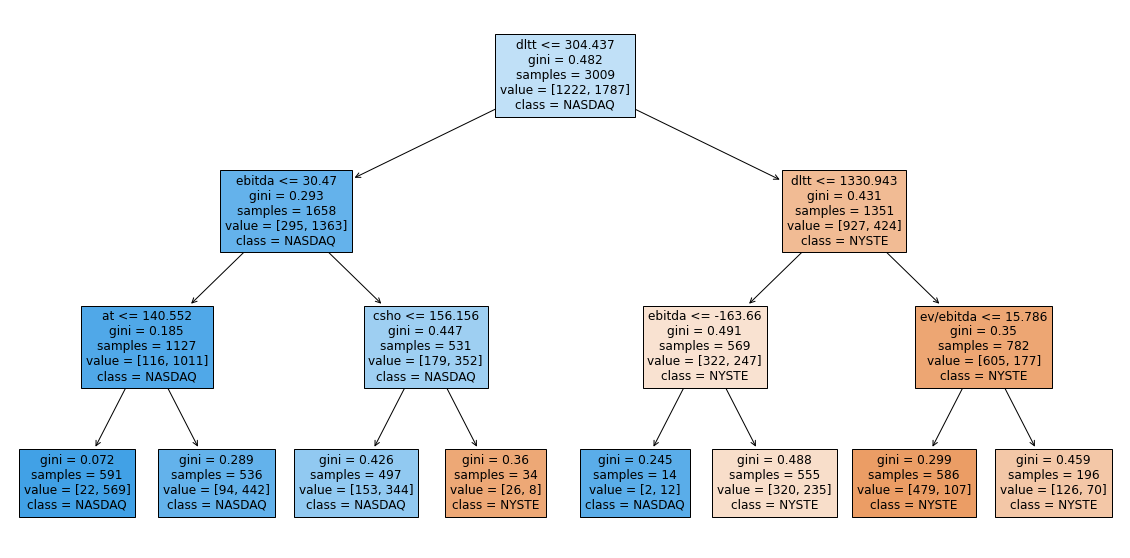

In [24]:
fig, ax = plt.subplots(figsize=(20, 10))

plot_tree(tree_classifier, filled = True, 
          feature_names=X.columns.values, class_names=['NYSTE', 'NASDAQ'], ax=ax)
plt.show()

The score is not too high:

In [25]:
tree_classifier.score(X_train,y_train)

0.7703555998670655

Performance for test data is comparable, so at least we don't overfit:

In [26]:
tree_classifier.score(X_test,y_test)

0.7589147286821706

Also take a look at the confusion matrix, where the rows/columns are again in order 'NYSTE', 'NASDAQ':

In [27]:
y_pred = tree_classifier.predict(X_test)
confusion_matrix(y_test, y_pred, labels=tree_classifier.classes_)

array([[377, 115],
       [196, 602]], dtype=int64)

###### Different hyperparameters

Among these are the hyperparameters we could adjust:

In [28]:
tree_classifier.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 1,
 'splitter': 'best'}

As we mostly covered `criterion` and `max_depth` in class, we will focus on those. `criterion` usually does not have that much of an impact (Raschka), but we will still use it. Also, as we have an unequal amount of observations form the different categories, we will see if changing the `class_weight` to "balanced" from the default "None" has an impact on the result.

In [29]:
# function that returns a dataframe with scores for DecisionTreeClassifier with
# different criterion and class_weight parameter combinations
def get_param_scores_2(depth_lim, criteria, weights, X_train, y_train, X_test, y_test):
    max_depths = []
    criterions = []
    class_weights = []
    train_scores = []
    test_scores = []
    for criterion in criteria:
        for weight in weights:
            for depth in range(1,depth_lim+1):
                tree_clf = DecisionTreeClassifier(max_depth=depth, criterion=criterion,
                                                  class_weight=weight, random_state=31)
                tree_clf.fit(X_train, y_train)
                max_depths.append(depth)
                criterions.append(criterion)
                class_weights.append(weight)
                train_scores.append(tree_clf.score(X_train, y_train))
                test_scores.append(tree_clf.score(X_test, y_test))
    df = pd.DataFrame({'max depth': max_depths, 'criterion': criterions,
                       'class weight': class_weights,
                       'train score': train_scores, 'test score': test_scores})
    return df

Take a look at the scores for the different choices of hyperparameter:

In [30]:
df_perf_t = get_param_scores_2(10, ['gini','entropy'], [None, 'balanced'], X_train, y_train, X_test, y_test)

In [31]:
df_perf_t[::5]

,max depth,criterion,class weight,train score,test score
0,1,gini,None,0.761050,0.761240
5,6,gini,None,0.803589,0.734884
10,1,gini,balanced,0.761050,0.761240
15,6,gini,balanced,0.800598,0.740310
20,1,entropy,None,0.761050,0.761240
25,6,entropy,None,0.793619,0.748837
30,1,entropy,balanced,0.761050,0.761240
35,6,entropy,balanced,0.782652,0.720155


There does not seem to be a big difference.  
But we can see how the overfitting gets progressively worse for higher levels of `max_depth`.  
(The last two columns again give the ratio of correctly classified stocks.)

For visualization we can also plot the scores over `max_depth` for combinations of the other parameter. (see https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)

In [32]:
# Plots a performance data frame
def plot_df_perf(df_perf):
    # Split up the dataframe
    df_perf_gn = df_perf[(df_perf['criterion']=='gini') & (df_perf['class weight'].isna())]
    df_perf_gb = df_perf[(df_perf['criterion']=='gini') & (df_perf['class weight']=='balanced')]
    df_perf_en = df_perf[(df_perf['criterion']=='entropy') & (df_perf['class weight'].isna())]
    df_perf_eb = df_perf[(df_perf['criterion']=='entropy') & (df_perf['class weight']=='balanced')]

    # Find min and max score value for consistent y-axes
    y_min = min(df_perf['train score'].min(),df_perf['test score'].min())*0.99
    y_max = max(df_perf['train score'].max(),df_perf['test score'].max())*1.01

    # Create plot
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
    df_perf_gn.plot(x='max depth', y=['train score', 'test score'], 
                   title='gini and equal weight', ylim=(y_min,y_max), ax=axes[0,0]);
    df_perf_gb.plot(x='max depth', y=['train score', 'test score'],
                   title='gini and balanced weight', ylim=(y_min,y_max), ax=axes[0,1]);
    df_perf_en.plot(x='max depth', y=['train score', 'test score'], 
                   title='entropy and equal weight', ylim=(y_min,y_max), ax=axes[1,0]);
    df_perf_eb.plot(x='max depth', y=['train score', 'test score'],
                   title='entropy and balanced weight', ylim=(y_min,y_max), ax=axes[1,1]);

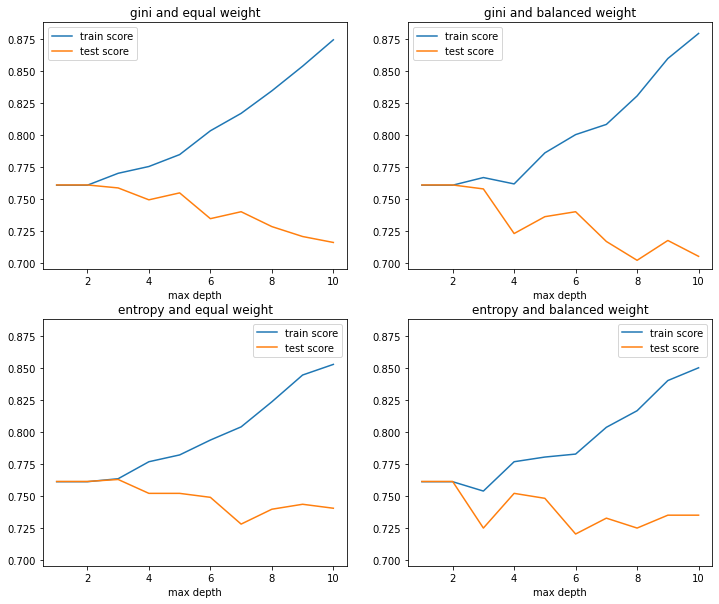

In [33]:
plot_df_perf(df_perf_t)

We don't see a lot of difference for `class_weights` and `criterion`.  
However, we can see that the accuracy for the test data rapidly declines for `max_depths` bigger than 3, and the difference in performance between training and test data also increases fast.

__2. Sentiment Analysis__

Attached you will find a file `text_data.csv` that contains a list of sentences related to finance. For each sentence, i.e., for each row in the table, the data contains an indicator for sentiment: negative, positive, or neutral.

Please use the data to create a bag-of-words model using only unigrams. Split the data into training and test data and use a DecisionTreeClassifier to predict the sentiment.

As in the previous questions, train the model for various choices of hyperparameters and report the results for training and test data for each choice.

Repeat the task except that you now use both unigrams and bigrams.

##### Import data

In [34]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [35]:
df2 = pd.read_csv("./data/text_data.csv", encoding='latin', names=['sentiment','text'])
df2

,sentiment,text
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...
...,...,...
4841,negative,LONDON MarketWatch -- Share prices ended lower...
4842,neutral,Rinkuskiai 's beer sales fell by 6.5 per cent ...
4843,negative,Operating profit fell to EUR 35.4 mn from EUR ...
4844,negative,Net sales of the Paper segment decreased to EU...


In [36]:
df2['sentiment'].value_counts()

neutral     2879
positive    1363
negative     604
Name: sentiment, dtype: int64

We have a lot more neutral sentences than positive and negative ones in the dataset.


##### Unigrams

First take a look at the bag of words to determine if we have to do additional cleaning:

In [37]:
count = CountVectorizer()
bag = count.fit_transform(df2['text'])
bag

<4846x10070 sparse matrix of type '<class 'numpy.int64'>'
	with 86331 stored elements in Compressed Sparse Row format>

In [38]:
count.vocabulary_

{'according': 794,
 'to': 9164,
 'gran': 4181,
 'the': 9058,
 'company': 2215,
 'has': 4324,
 'no': 6254,
 'plans': 6889,
 'move': 6055,
 'all': 991,
 'production': 7131,
 'russia': 7864,
 'although': 1024,
 'that': 9057,
 'is': 4887,
 'where': 9855,
 'growing': 4222,
 'technopolis': 8962,
 'develop': 2751,
 'in': 4622,
 'stages': 8545,
 'an': 1065,
 'area': 1178,
 'of': 6374,
 'less': 5381,
 'than': 9053,
 '100': 49,
 '000': 1,
 'square': 8525,
 'meters': 5867,
 'order': 6479,
 'host': 4487,
 'companies': 2213,
 'working': 9946,
 'computer': 2271,
 'technologies': 8958,
 'and': 1075,
 'telecommunications': 8987,
 'statement': 8569,
 'said': 7897,
 'international': 4816,
 'electronic': 3122,
 'industry': 4685,
 'elcoteq': 3112,
 'laid': 5258,
 'off': 6378,
 'tens': 9014,
 'employees': 3165,
 'from': 3981,
 'its': 4917,
 'tallinn': 8887,
 'facility': 3650,
 'contrary': 2385,
 'earlier': 3027,
 'layoffs': 5317,
 'contracted': 2380,
 'ranks': 7341,
 'office': 6385,
 'workers': 9941,
 'dai

As we can see, the CountVectorizer already converts to lowercase per default.  
We could exclude numbers but decided against it.  
We will exclude stop words.

In [39]:
X = df2['text']
y = df2['sentiment']

Create a BOW again but with tfidf.  
We need to do this before the training/test split as otherwise not all words from the test data would be in the vocabulary.  
In this step we already exclude stop words.

In [40]:
tfidf = TfidfVectorizer(stop_words='english')
X_bag = tfidf.fit_transform(X)
X_bag

<4846x9820 sparse matrix of type '<class 'numpy.float64'>'
	with 57684 stored elements in Compressed Sparse Row format>

Next we split the data into training and test data.

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X_bag, y, test_size=0.3,
                                                    random_state=1, stratify=y)

###### Example

Now we look at one example of a decision tree before testing out different choices of hyperparameters.

In [42]:
tree_classifier = DecisionTreeClassifier(max_depth=3, random_state=31)
tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=31)

We visualize the tree:

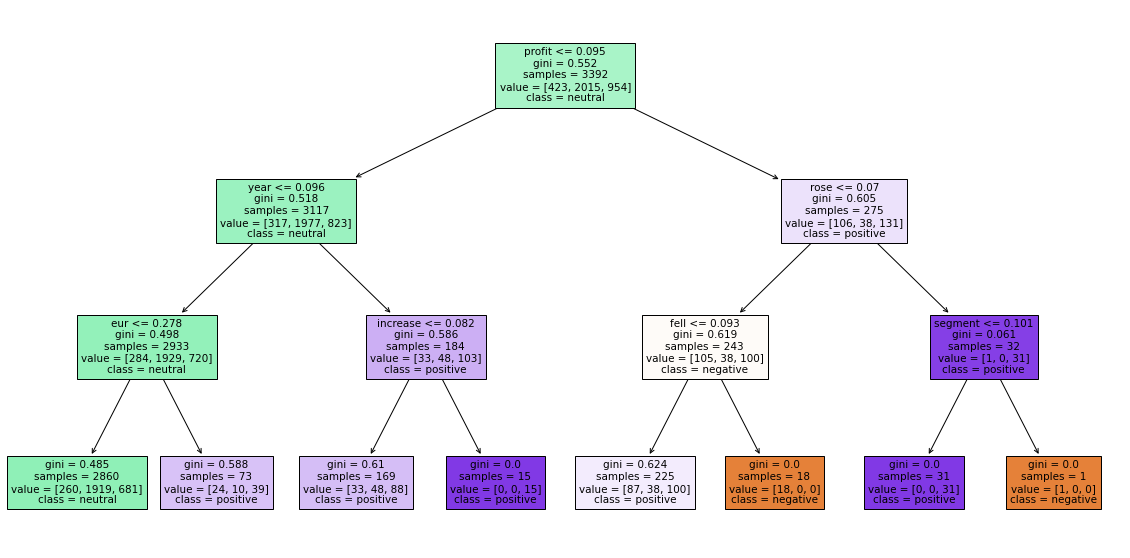

In [43]:
fig, ax = plt.subplots(figsize=(20, 10))

plot_tree(tree_classifier, filled = True, 
          feature_names=tfidf.get_feature_names(),
          class_names=tree_classifier.classes_, ax=ax)
plt.show()

The score is not too high:

In [44]:
tree_classifier.score(X_train,y_train)

0.6518278301886793

Performance for test data is comparable, so at least we don't overfit:

In [45]:
tree_classifier.score(X_test,y_test)

0.6334250343878954

Also take a look at the confusion matrix, where the rows/columns are in order:

In [46]:
tree_classifier.classes_

array(['negative', 'neutral', 'positive'], dtype=object)

In [47]:
y_pred = tree_classifier.predict(X_test)
confusion_matrix(y_test, y_pred, labels=tree_classifier.classes_)

array([[  3, 109,  69],
       [  0, 812,  52],
       [  0, 303, 106]], dtype=int64)

We can see that the accuracy for neutral sentences is very good, but for positive and negative sentences it is very bad. This was to be expected, as we have a lot more neutral sentences in the data set, so the decision tree prioritizes those.

###### Different hyperparameters

Among these are the hyperparameters we could adjust:

In [48]:
tree_classifier.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 31,
 'splitter': 'best'}

Again, as we mostly covered `criterion` and `max_depth` in class, we will focus on those. `criterion` usually does not have that much of an impact (Raschka), but we will still use it. Also, as we noted before, we have an unequal amount of observations form the different categories, so we will see if changing the `class_weight` to "balanced" from the default "None" has an impact on the result.

Take a look at the scores for the different choices of hyperparameter:

In [49]:
df_perf_u = get_param_scores_2(10, ['gini','entropy'], [None, 'balanced'], X_train, y_train, X_test, y_test)

In [50]:
df_perf_u[::5]

,max depth,criterion,class weight,train score,test score
0,1,gini,None,0.621462,0.621733
5,6,gini,None,0.690448,0.665750
10,1,gini,balanced,0.614387,0.613480
15,6,gini,balanced,0.672170,0.654746
20,1,entropy,None,0.621462,0.621733
25,6,entropy,None,0.686026,0.660248
30,1,entropy,balanced,0.614387,0.613480
35,6,entropy,balanced,0.685436,0.659560


There does not seem to be a big difference.    
But we can see how the overfitting gets progressively worse for higher levels of `max_depth`.

For visualization we can also plot the scores over `max_depth` for combinations of the other parameter. (see https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)

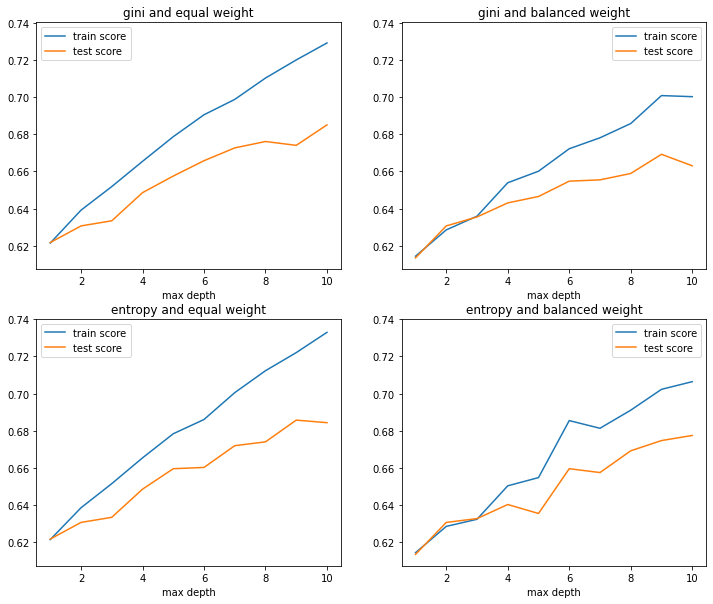

In [51]:
plot_df_perf(df_perf_u)

The overfitting seems less severe for balanced `class_weights`, while the `criterion` seems to have less impact overall.  
The differences in performance are minimal in general.

##### Unigrams and Bigrams

We now repeat the analysis with unigrams and bigrams.

In [52]:
tfidf = TfidfVectorizer(stop_words='english',ngram_range=(1,2))
X_bag_ub = tfidf.fit_transform(X)
X_bag_ub

<4846x50818 sparse matrix of type '<class 'numpy.float64'>'
	with 113662 stored elements in Compressed Sparse Row format>

So we found about 40.000 bigrams additional to the 10.000 unigrams

Training/test split:

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X_bag_ub, y, test_size=0.3,
                                                    random_state=1, stratify=y)

Combine different hyperparameters and get their score:

In [54]:
df_perf_ub = get_param_scores_2(10, ['gini','entropy'], [None, 'balanced'], X_train, y_train, X_test, y_test)

In [55]:
df_perf_ub[::5]

,max depth,criterion,class weight,train score,test score
0,1,gini,None,0.621167,0.621733
5,6,gini,None,0.689269,0.667125
10,1,gini,balanced,0.613797,0.613480
15,6,gini,balanced,0.670991,0.651994
20,1,entropy,None,0.621167,0.621733
25,6,entropy,None,0.688090,0.667813
30,1,entropy,balanced,0.613797,0.613480
35,6,entropy,balanced,0.670991,0.656121


Plot them:

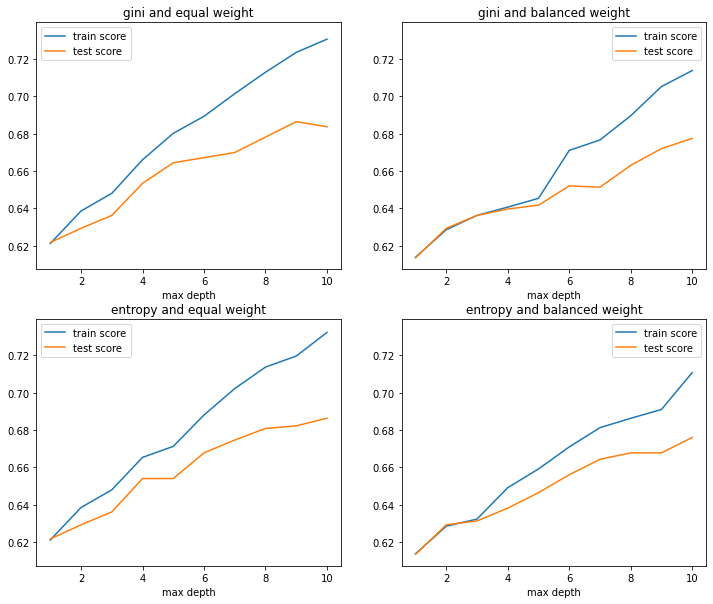

In [56]:
plot_df_perf(df_perf_ub)

The performance has not changed much compared to the case where we use only unigrams.